# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/atrmac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file /Users/atrmac/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/atrmac/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
news_API = NewsApiClient(api_key)
news_API

In [4]:
# Fetch the Bitcoin news articles
btc_news = news_API.get_everything(
    q="Bitcoin",
    language="en"
)

# Verify data & print first 5 articles
btc_news["articles"][:5]

[{'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Jeff Somers',
  'title': 'Is the Crypto Bubble Going to Burst?',
  'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
  'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
  'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
  'publishedAt': '2022-02-09T16:00:00Z',
  'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
 {'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': '

In [5]:
# Fetch the Ethereum news articles
eth_news = news_API.get_everything(
    q="Ethereum",
    language="en"
)

# Verify data & print first 5 articles
eth_news["articles"][:5]

[{'source': {'id': 'wired', 'name': 'Wired'},
  'author': 'Omar L. Gallaga',
  'title': 'Playing With Crypto? You’ll Need a Wallet (or Several)',
  'description': 'Buying and selling NFTs or transferring digital currency is going to require a little leap of faith. Here’s how to get started.',
  'url': 'https://www.wired.com/story/how-to-choose-set-up-crypto-wallet/',
  'urlToImage': 'https://media.wired.com/photos/620415899266d5d11c07b346/191:100/w_1280,c_limit/Gear-Coinbase-App-Screens.jpg',
  'publishedAt': '2022-02-10T14:00:00Z',
  'content': "If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there'd be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars]"},
 {'source': {'id': None, 'name': 'Investorplace.com'},
  'author': 'InvestorPlace',
  'title': 'The Market Has Spoken, and It Says Ethereum Is Valuable',
  'description': 'Technical analysis isn’t a perfect tool, but it may point

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sent = []

for article in btc_news["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sent.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sent)

# Print first 5 rows of dataframe

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
3,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
4,2022-01-26,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sent = []

for article in eth_news["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sent.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sent)

# Print first 5 rows of dataframe

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-10,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-09,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000
3,2022-01-31,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000
4,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.181095,0.090800,0.041600,0.867600
std,0.459473,0.059023,0.057329,0.061515
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.225725,0.045750,0.000000,0.834750
50%,0.295700,0.092500,0.000000,0.873500
75%,0.585900,0.145250,0.085500,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.054765,0.053050,0.030550,0.916450
std,0.361855,0.073697,0.049529,0.087686
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.102700,0.000000,0.000000,0.822500
50%,0.000000,0.019500,0.000000,0.942500
75%,0.152575,0.063250,0.059750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin appears to have the highest positive mean score with .090800 compared to Ethereum's at .053050.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score with .834100 compared to Ethereum's at .778300.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score with .234000 compared to Bitcoin's .185000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
# Expand the default stopwords list if necessary

stop = stopwords.words('english')

stop.append('')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append('chars')
stop.append('Chars')
stop.append("''")
stop.append('bitcoin')
stop.append('Bitcoin')
stop.append('cryptocurrency')
stop.append('Cryptocurrency')
stop.append('Newsletter')
stop.append('newsletter')
stop.append('Reuters')
stop.append('Bitcoin')
stop.append('bitcoin')
stop.append('Ethereum')
stop.append('ethereum')
stop.append('u')
stop.append('reuters')
stop.append(' u')
stop.append('u ')
stop.append('crypto')
stop.append('feb')
stop.append('el')
stop.append('U')
stop.append('dollar')
stop.append('money')
stop.append('new')
stop.append('people')
stop.append('find')
stop.append('token')
stop.append('time')
stop.append('investment')
stop.append('cryptocurrencies')
stop.append('one')
stop.append('popular')
stop.append('version')
stop.append('article')
stop.append('fund')
stop.append('wallet')
stop.append('illustration')
stop.append('last')
stop = set(stop)
print(stop)

{'', 'wouldn', 'U', 'only', 'newsletter', 'Newsletter', 'why', 'Bitcoin', 'few', 'u ', 'again', 'hadn', "weren't", 'so', 'char', 'no', "shouldn't", '\\`', 've', 'from', 'chars', 'bitcoin', 'me', 'above', "mustn't", 'its', ' u', "needn't", 'can', 'at', "''", 'their', 'he', 'were', 'a', "didn't", 'the', 'before', 'whom', 'wallet', 't', 'find', 'article', 'having', 'myself', 'against', "you'll", 'other', 'cryptocurrency', 'have', 'my', 'or', 'in', 'just', "hasn't", 'off', 'isn', "isn't", 'illustration', 'been', 'shouldn', "it'", 'Chars', 'by', 'there', 'doing', 'didn', 'his', 'd', 'u', "doesn't", 'Ethereum', 'too', "haven't", 'him', 'ours', "she's", 'you', 'out', 'some', 'once', 'down', "should've", 'doesn', 'haven', "you're", 'hasn', 'but', 'version', 'as', "'s", 'herself', 'through', 'during', 'any', 'will', 'what', 'about', 'while', 'they', 'between', 'than', 'did', 'your', 'shan', 'aren', 'most', 'are', 's', 'now', 'more', 'our', 'to', 'on', 'themselves', "hadn't", 'people', 'each', '

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    #Create a list of the words
    tokenized = word_tokenize(text)

    #Convert the words to lowercase
    words_lowered = [word.lower() for word in tokenized]

    #Remove the punctuation
    regex = re.compile('[^a-zA-Z ]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    #Remove the stop words including additional stopwords
    stopwords_removed = [word.lower() for word in words_regexed if word not in stop]

    #Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]
    
    return tokens

In [27]:
# Create a new tokens column for Bitcoin
btc_tokens = [tokenizer(article) for article in btc_df['text']]
btc_df['tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, might, notice..."
1,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[salvador, introduced, legal, tender, alongsid..."
2,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
3,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, making, docuseries, worst, rapper, c..."
4,2022-01-26,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[british, entrepreneur, financier, richard, od..."


In [28]:
# Create a new tokens column for Ethereum
eth_tokens = [tokenizer(article) for article in eth_df['text']]
eth_df["tokens"] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-10,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[buy, intended, hold, speculative, investment,..."
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,2022-02-09,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000,"[enables, l, platform, bootstrap, national, ec..."
3,2022-01-31,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000,"[meansandends, moralist, nondoers, always, end..."
4,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, a..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
# Generate the Bitcoin N-grams where N=2
btc_words = []
for word in btc_tokens:
    btc_words.extend(word)
btc_ngrams = Counter(ngrams(btc_words, n=2))
print(btc_ngrams.most_common())

[(('alex', 'castro'), 3), (('castro', 'verge'), 3), (('alongside', 'u'), 2), (('international', 'monetary'), 2), (('mr', 'lichtenstein'), 2), (('even', 'arent'), 1), (('arent', 'paying'), 1), (('paying', 'attention'), 1), (('attention', 'might'), 1), (('might', 'noticed'), 1), (('noticed', 'value'), 1), (('value', 'plummeted'), 1), (('plummeted', 'week'), 1), (('week', 'total'), 1), (('total', 'value'), 1), (('value', 'market'), 1), (('market', 'tumbling'), 1), (('tumbling', 'high'), 1), (('high', 'tr'), 1), (('tr', 'salvador'), 1), (('salvador', 'introduced'), 1), (('introduced', 'legal'), 1), (('legal', 'tender'), 1), (('tender', 'alongside'), 1), (('u', 'alex'), 1), (('verge', 'international'), 1), (('monetary', 'executive'), 1), (('executive', 'board'), 1), (('board', 'recommended'), 1), (('recommended', 'israeli'), 1), (('israeli', 'national'), 1), (('national', 'tal'), 1), (('tal', 'prihar'), 1), (('prihar', 'pled'), 1), (('pled', 'guilty'), 1), (('guilty', 'routing'), 1), (('rou

In [31]:
# Generate the Ethereum N-grams where N=2
eth_words = []
for word in eth_tokens:
    eth_words.extend(word)
eth_ngrams = Counter(ngrams(eth_words, n=2))
print(eth_ngrams.most_common())

[(('published', 'metaverse'), 3), (('metaverse', 'subscribe'), 3), (('subscribe', 'weekly'), 3), (('weekly', 'guide'), 3), (('guide', 'future'), 3), (('past', 'issue'), 3), (('trading', 'volume'), 2), (('million', 'donated'), 2), (('profile', 'picture'), 2), (('online', 'thief'), 2), (('thief', 'made'), 2), (('wrapped', 'worth'), 2), (('worth', 'nearly'), 2), (('nearly', 'million'), 2), (('million', 'getty'), 2), (('getty', 'image'), 2), (('image', 'hacker'), 2), (('million', 'wormhole'), 2), (('wormhole', 'developer'), 2), (('future', 'internet'), 2), (('internet', 'past'), 2), (('buy', 'intended'), 1), (('intended', 'hold'), 1), (('hold', 'speculative'), 1), (('speculative', 'investment'), 1), (('investment', 'real'), 1), (('real', 'need'), 1), (('need', 'wallet'), 1), (('wallet', 'exchange'), 1), (('exchange', 'online'), 1), (('online', 'brokerage'), 1), (('brokerage', 'convert'), 1), (('convert', 'dollar'), 1), (('dollar', 'sa'), 1), (('sa', 'technical'), 1), (('technical', 'analys

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Use token_count to get the top 10 words for Bitcoin
btc_top = token_count(btc_words, N=10)
btc_top

[('u', 5),
 ('salvador', 3),
 ('alex', 3),
 ('castro', 3),
 ('verge', 3),
 ('lichtenstein', 3),
 ('even', 2),
 ('value', 2),
 ('week', 2),
 ('legal', 2)]

In [34]:
# Use token_count to get the top 10 words for Ethereum
eth_top = token_count(eth_words, N=10)
eth_top

[('million', 7),
 ('online', 4),
 ('platform', 3),
 ('year', 3),
 ('nfts', 3),
 ('published', 3),
 ('metaverse', 3),
 ('subscribe', 3),
 ('weekly', 3),
 ('guide', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

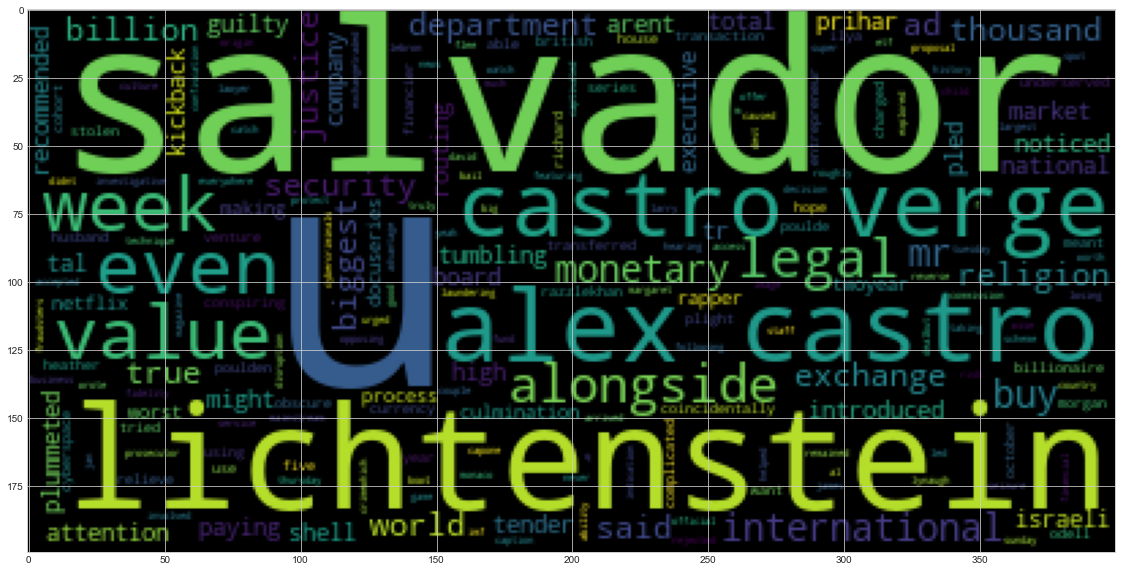

In [36]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc_words)
btc_wordcloud = WordCloud().generate(btc_string)
plt.imshow(btc_wordcloud)

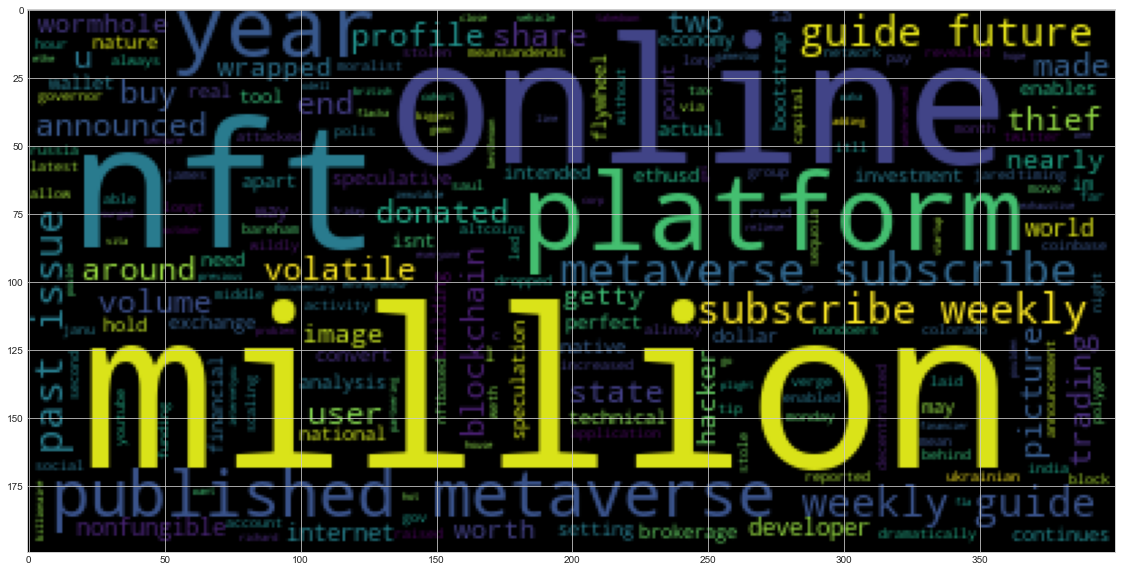

In [37]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_words)
eth_wordcloud = WordCloud().generate(eth_string)
plt.imshow(eth_wordcloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
btc_text = []
for text in btc_df.text:
    btc_text.append(text)
    
# Convert into a string
btc_text_str = ' '.join([str(elem) for elem in btc_text])

# Verify appended string
print(btc_text_str)

Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge

 

 The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies 
Illustration by Alex Castro / The Verge
In the culmination of a two-year legal process, … [+1448 chars] Netflix
 is making a docuseries about one of the worst rappers of all time
. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars] British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved cohort: Bitcoin bil

In [42]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text_str)

In [43]:
# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin - Named-Entity Recoginition"

In [44]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [46]:
# List all Entities
btc_entities = [ent.text for ent in btc_ner.ents if ent.label_ in ['PERSON', 'GPE', 'ORG',]]
print(btc_entities)

['El Salvador', 'US', 'Alex Castro', 'Verge', 'The International Monetary Fund’s', 'El', 'Tal Prihar', 'Illustration', 'Alex Castro', 'Verge', 'Netflix', 'Ilya Lichtenstein', 'Richard ODell', 'house', 'Poulde', 'Lichtensteins', 'the Department of Justice', 'Monaco', 'Margaret Lynaugh', 'Bitcoin', 'El Salvador', 'US', 'The International Monetary Fund', 'El Salvador', 'Reuters', 'Reuters', 'The U.S. Securities and Exchange Commission', 'ETF', 'Fidelitys Wise Origin Bitcoin', '+202', 'Sundays Super Bowl', 'Larry David', 'LeBron James', '+3454', 'Lichtensteins', 'Reuters', 'Reuters', 'Bitcoin', 'Reuters', 'YouTube', 'Alex Castro', 'Verge', 'BitConnect', 'Bloombergs Lorcan Roche Kelly']


---

### Ethereum NER

In [47]:
# Concatenate all of the Ethereum text together
eth_text = []
for text in eth_df.text:
    eth_text.append(text)
    
# Convert into a string
eth_text_str = ' '.join([str(elem) for elem in eth_text])

# Verify appended string
print(eth_text_str)

If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there'd be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars] Technical analysis isnt a perfect tool, but it may point the way for Ethereum
Ethereum (ETH-USD
) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars] This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its native token and actual building of applications and activities in … [+4057 chars] The means-and-ends moralists, or non-doers, always end up on their ends
without any means.
-- Saul Alinsky Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin's share dropped dramatically. 
Between 2020 and 2021, ethereum trading volume in… [+1187 chars] People in Colorado will be able to p

In [48]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text_str)

In [49]:
# Add a title to the document
eth_ner.user_data["title"] = "Ethereum - Named-Entity Recoginition"

In [50]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [51]:
# List all Entities
eth_entities = [ent.text for ent in eth_ner.ents if ent.label_ in ['PERSON', 'GPE', 'ORG',]]
print(eth_entities)

['Ethereum', 'ETH-USD', 'Crypto', 'Saul Alinsky Coinbase', 'Colorado', 'US', 'Jared Polis', 'James Bareham', 'Ukrainian', 'Russia', 'Ethereum', 'NFT', 'Reuters', 'Sequoia Capital India', 'Getty Images', 'Wormhole', 'wEth', 'Ethereum', 'Getty Images', 'Wormhole', 'YouTube', 'Waka Flacka Fla', 'Richard ODell', 'house', 'Poulde', 'Reuters', 'Bitcoin', 'TIME', 'Vita', 'TIME', 'TIME', 'Reuters', 'NFT', 'Reuters', 'UK']


---